<a href="https://colab.research.google.com/github/ttma333/python/blob/main/6%EA%B0%9C_CNN_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%EC%84%B1%EB%8A%A5_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense
from keras.utils import plot_model

# simple dnn

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train, X_test = X_train/255., X_test/255. # 0 ~ 1 사이로 스케일링

In [ ]:
x_t = X_train[:50000]
y_t = y_train[:50000]
x_val = X_train[50000:]
y_val = y_train[50000:]

In [ ]:
X_train[0]
print(x_t.shape, y_t.shape, x_val.shape, y_val.shape )

(50000, 28, 28) (50000,) (10000, 28, 28) (10000,)


In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),    
    layers.Dense(64,activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_t, y_t, epochs = 10, batch_size = 128, validation_data=(x_val,y_val))
model.evaluate(X_test,y_test)

Epoch 1/10
391/391 [==============================] - 4s 4ms/step - loss: 0.4649 - accuracy: 0.8739 - val_loss: 0.2146 - val_accuracy: 0.9410
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9446 - val_loss: 0.1516 - val_accuracy: 0.9576
Epoch 3/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1445 - accuracy: 0.9581 - val_loss: 0.1328 - val_accuracy: 0.9634
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9665 - val_loss: 0.1135 - val_accuracy: 0.9687
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0957 - accuracy: 0.9718 - val_loss: 0.1081 - val_accuracy: 0.9699
Epoch 6/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9763 - val_loss: 0.1056 - val_accuracy: 0.9721
Epoch 7/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1011 - val_accuracy: 0.9710
Epoch 

[0.08879679441452026, 0.9714999794960022]

# simple CNN

CNN

완전 연결 네트워크의 문제점으로부터 시작

- 매개변수의 폭발적인 증가
- 공간 추론의 부족
 - 픽셀 사이의 근접성 개념이 완전 연결 계층에서는 손실됨
- 합성곱 계층은 입력 이미지가 커져도 튜닝해야 할 매
컨볼루션 연산
- 필터 연산
 - 입력 데이터에 필터를 통한 어떠한 연산을 진행
 - 필터에 대응하는 원소끼리 곱하고 그 합을 구함
 - 연산이 완료된 결과 데이터를 특징 맵이라 부름
- 필터
 - 커널이라고도 하며 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념
 - 필터의 사이즈는 '거의 항상 홀수'
  - 짝수이면 패딩이 비대칭이 되어버림
  - 왼쪽, 오른쪽을 다르게 주어야함
  - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재
 - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정, 따라서 과적합을 방지할 수 있음

An example of convolution operation  
https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524

- 일반적으로 합성곱 연산을 한 후의 데이터 사이즈는 (n - f + 1) x (n - f + 1)

- 패딩과 스트라이드
 - 필터(커널) 사이즈와 함께 입력 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
 - 사용자가 결정할 수 있음
 - 패딩은 입력 데이터의 주변을 특정 값으로 채우는 기법. 주로 0으로 많이 채움
 - 출력 데이터의 크기 : (n + 2p - f +1) x (n + 2p -f + 1)
 - valid(패딩을 주지 않음) 와 same(패딩을 주어 입력 이미지와 연산 후의 이미지가 같게 함), 패딩의 크기는 (k-1)/2 (단, stride=1)
 - 스트라이드는 필터를 적용하는 간격을 의미

 https://kingnamji.tistory.com/24

 https://m.blog.naver.com/jevida/221841296542

 풀링(Pooling)
- 필터 사이즈 내에서 특정 값을 추출하는 과정
- Max Pooling : 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
- 특징맵의 크기를 절반으로 줄임
- 모델이 물체의 주요한 특성을 학습하도록 해주며 컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
- 모델의 파라미터 개수를 줄여주고 연산 속도를 빠르게 해줌

https://cs231n.github.io/convolutional-networks/



In [ ]:
import numpy as np

x_t = x_t[..., np.newaxis]
x_val = x_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
# model2 = keras.Sequential([
#     layers.Conv2D(64,3, input_shape= (28,28,1), activation = 'relu', kernel_initializer="he_normal"),
#     layers.MaxPool2D(),
#     layers.Dropout(0.5),
#     layers.Conv2D(32,3,activation = 'relu', kernel_initializer="he_normal"),
#     layers.Flatten(),
#     layers.Dropout(0.5),    
#     layers.Dense(128, activation = 'relu', kernel_initializer="he_normal"),
#     layers.Dense(10,activation = 'softmax')
# ])
inputs = keras.Input(shape= (28,28,1))
x = layers.Conv2D(64,3,activation = 'relu', kernel_initializer="he_normal")(inputs)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(32,3,activation = 'relu', kernel_initializer="he_normal")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)   
x = layers.Dense(128, activation = 'relu', kernel_initializer="he_normal")(x)
outputs = layers.Dense(10,activation = 'softmax')(x)
model2 = keras.Model(inputs, outputs)

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 flatten_6 (Flatten)         (None, 3872)              0         
                                                           

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model2.fit(x_t, y_t, epochs = 10, batch_size = 128, validation_data=(x_val,y_val))
model.evaluate(X_test,y_test)

Epoch 1/10
391/391 [==============================] - 3s 8ms/step - loss: 0.3193 - accuracy: 0.9010 - val_loss: 0.0775 - val_accuracy: 0.9774
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 0.1006 - accuracy: 0.9679 - val_loss: 0.0544 - val_accuracy: 0.9846
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0732 - accuracy: 0.9767 - val_loss: 0.0427 - val_accuracy: 0.9882
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0432 - val_accuracy: 0.9888
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0499 - accuracy: 0.9836 - val_loss: 0.0384 - val_accuracy: 0.9889
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0361 - val_accuracy: 0.9896
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.0389 - accuracy: 0.9870 - val_loss: 0.0339 - val_accuracy: 0.9907
Epoch 

[0.08879679441452026, 0.9714999794960022]

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_wrong = (y_pred != y_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_wrong.sum()

285

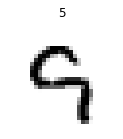

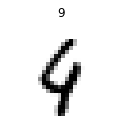

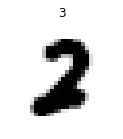

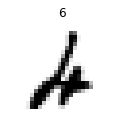

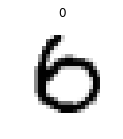

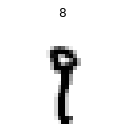

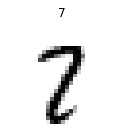

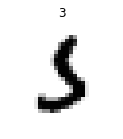

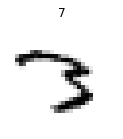

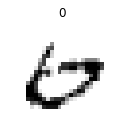

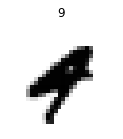

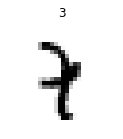

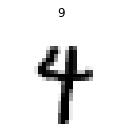

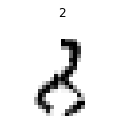

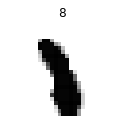

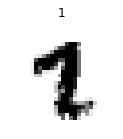

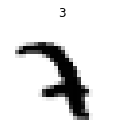

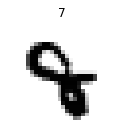

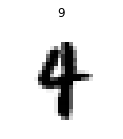

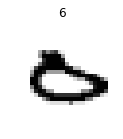

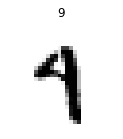

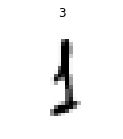

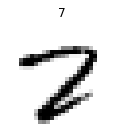

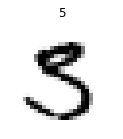

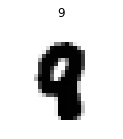

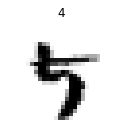

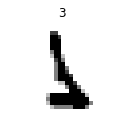

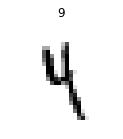

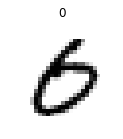

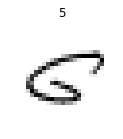

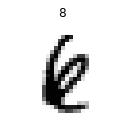

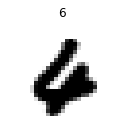

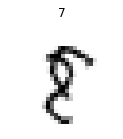

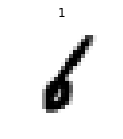

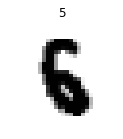

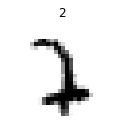

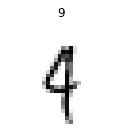

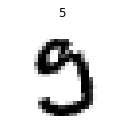

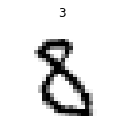

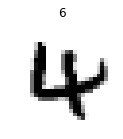

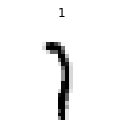

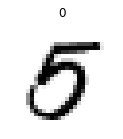

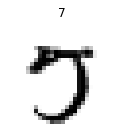

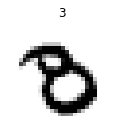

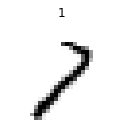

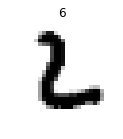

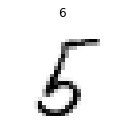

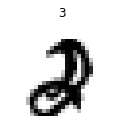

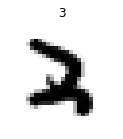

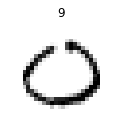

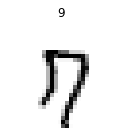

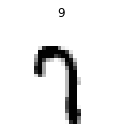

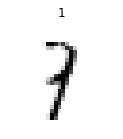

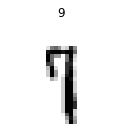

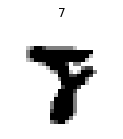

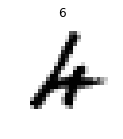

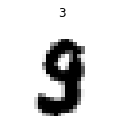

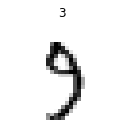

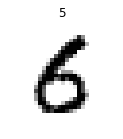

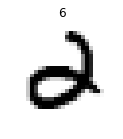

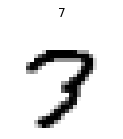

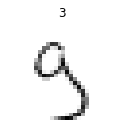

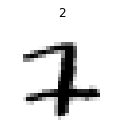

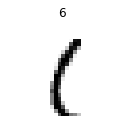

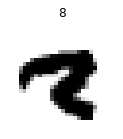

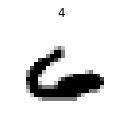

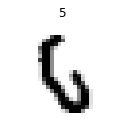

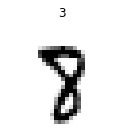

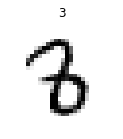

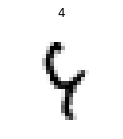

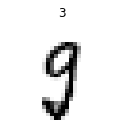

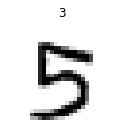

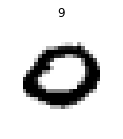

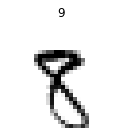

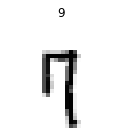

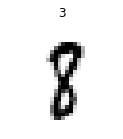

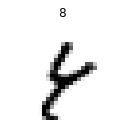

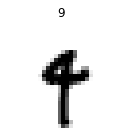

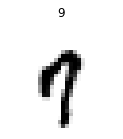

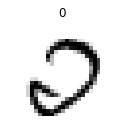

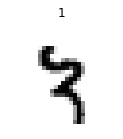

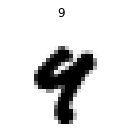

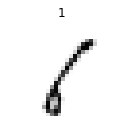

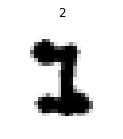

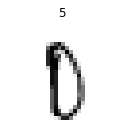

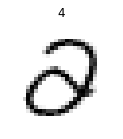

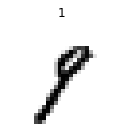

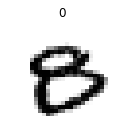

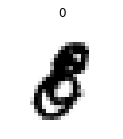

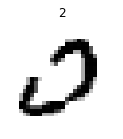

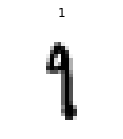

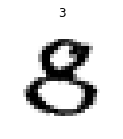

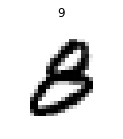

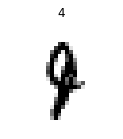

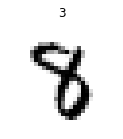

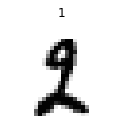

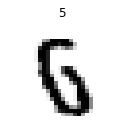

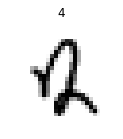

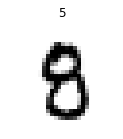

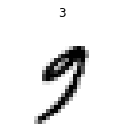

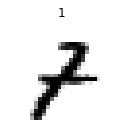

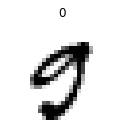

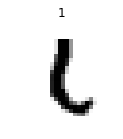

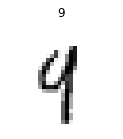

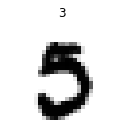

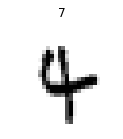

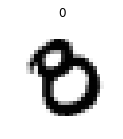

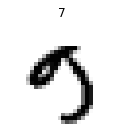

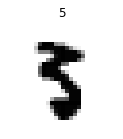

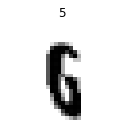

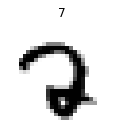

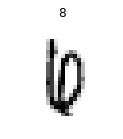

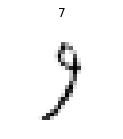

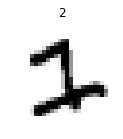

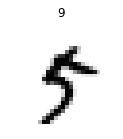

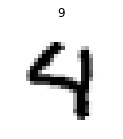

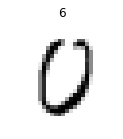

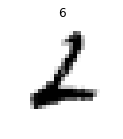

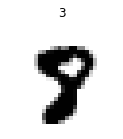

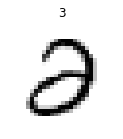

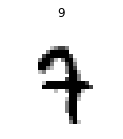

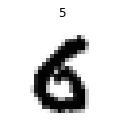

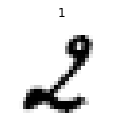

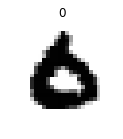

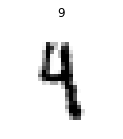

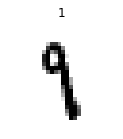

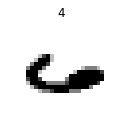

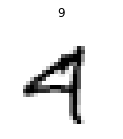

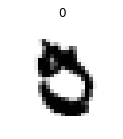

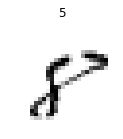

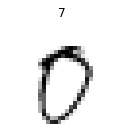

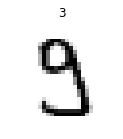

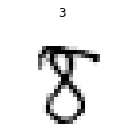

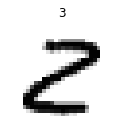

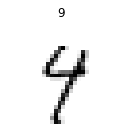

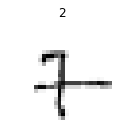

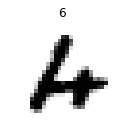

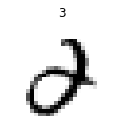

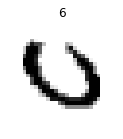

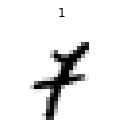

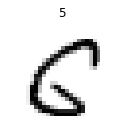

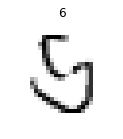

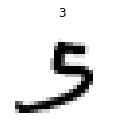

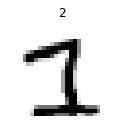

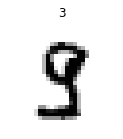

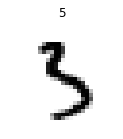

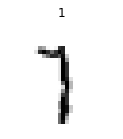

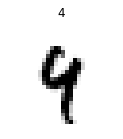

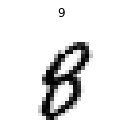

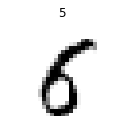

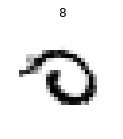

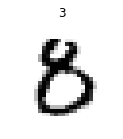

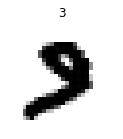

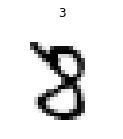

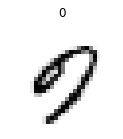

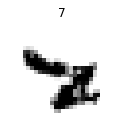

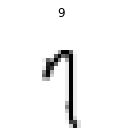

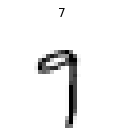

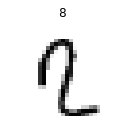

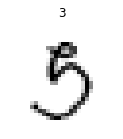

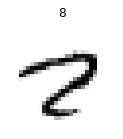

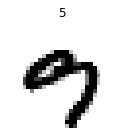

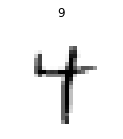

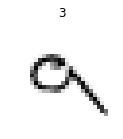

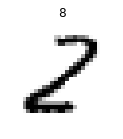

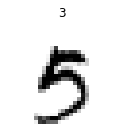

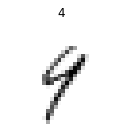

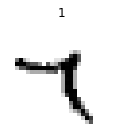

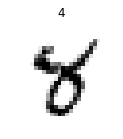

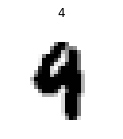

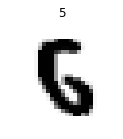

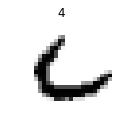

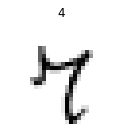

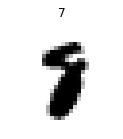

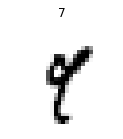

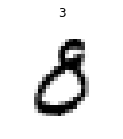

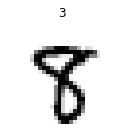

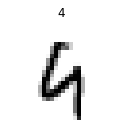

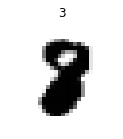

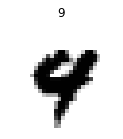

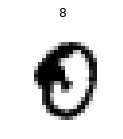

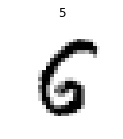

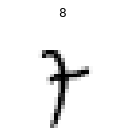

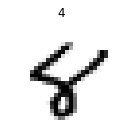

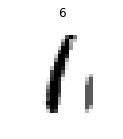

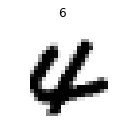

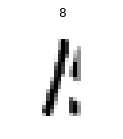

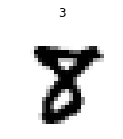

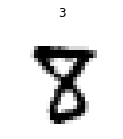

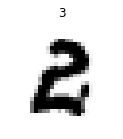

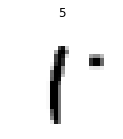

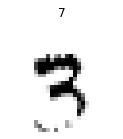

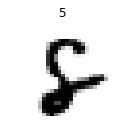

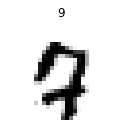

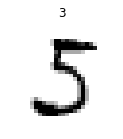

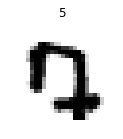

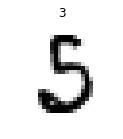

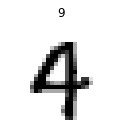

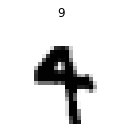

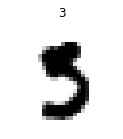

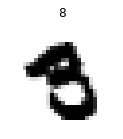

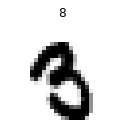

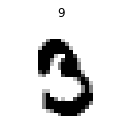

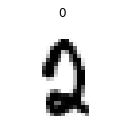

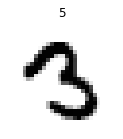

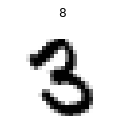

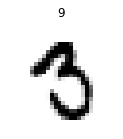

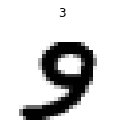

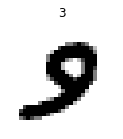

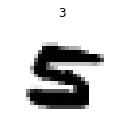

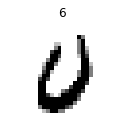

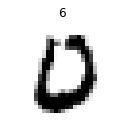

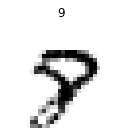

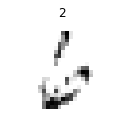

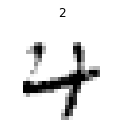

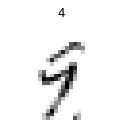

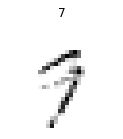

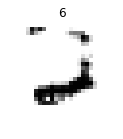

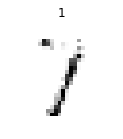

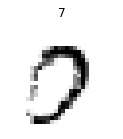

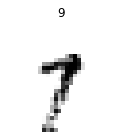

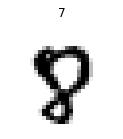

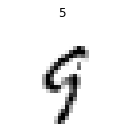

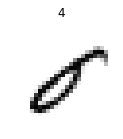

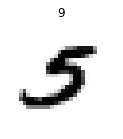

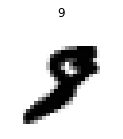

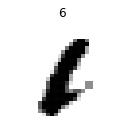

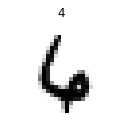

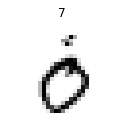

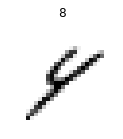

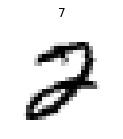

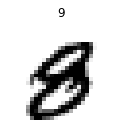

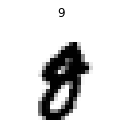

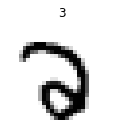

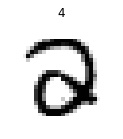

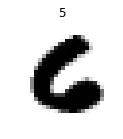

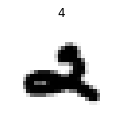

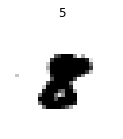

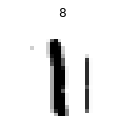

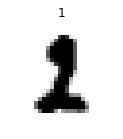

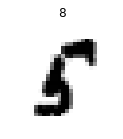

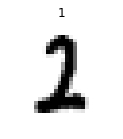

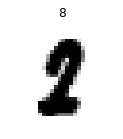

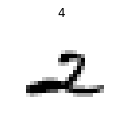

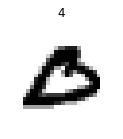

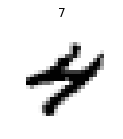

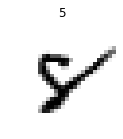

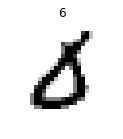

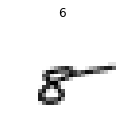

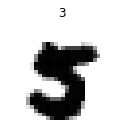

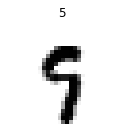

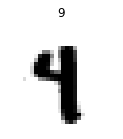

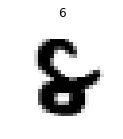

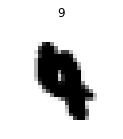

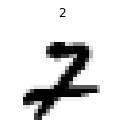

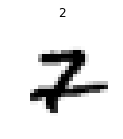

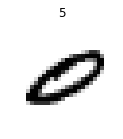

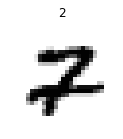

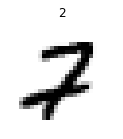

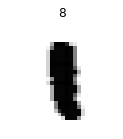

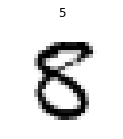

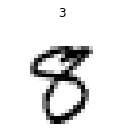

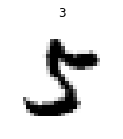

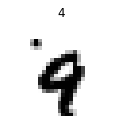

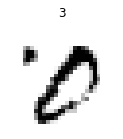

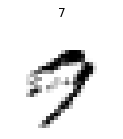

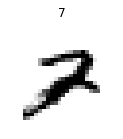

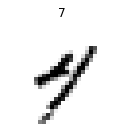

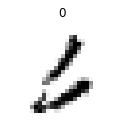

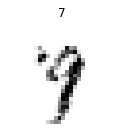

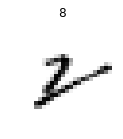

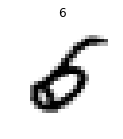

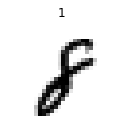

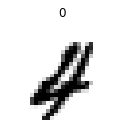

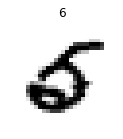

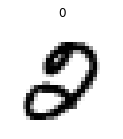

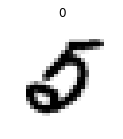

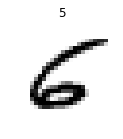

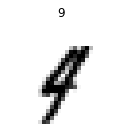

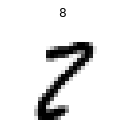

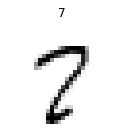

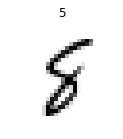

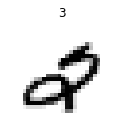

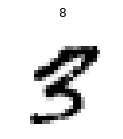

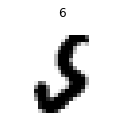

In [ ]:
import matplotlib.pyplot as plt

for index, image in enumerate(X_test):
  if (y_wrong[index]) :
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[index][:,:,0], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_pred[index])
    plt.show()      

# 개 고양이 분류

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1ipzN9okFFT3oieklsrfr6iUHzjPAbT9i"
gdown.download(url, "cats_and_dogs.tar") 

Downloading...
From: https://drive.google.com/uc?id=1ipzN9okFFT3oieklsrfr6iUHzjPAbT9i
To: /content/cats_and_dogs.tar
100%|██████████| 94.0M/94.0M [00:00<00:00, 302MB/s]


'cats_and_dogs.tar'

In [ ]:
!tar -xvf cats_and_dogs.tar

In [ ]:
import os

train_dir = './cats_and_dogs/train'
validation_dir = './cats_and_dogs/validation'
test_dir = './cats_and_dogs/test'

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs') 

In [ ]:
import keras
import scipy

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 부동소수점으로 스케일을 조정하는 제너레이터 객체를 만들자.
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(       
        train_dir,                # 타깃 디렉터리
        target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=20,           #  20개씩 배치로 생산        
        class_mode='binary')     # 이진 레이블. 만약 다중클래스라면 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape= (150,150,3))
x = layers.Conv2D(128,3,activation = 'relu', kernel_initializer="he_normal")(inputs)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64,3,activation = 'relu', kernel_initializer="he_normal")(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32,3,activation = 'relu', kernel_initializer="he_normal")(x)
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation = 'relu', kernel_initializer="he_normal")(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model3 = keras.Model(inputs, outputs)

In [ ]:
model3.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_61 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_45 (Bat  (None, 74, 74, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_62 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0  

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_dogs_cats',
        save_best_only = True,
        moniter = 'val_loss'
    )
]

In [ ]:
model3.fit(train_generator, validation_data = validation_generator, epochs= 30, callbacks = callbacks) 

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 4.4067 - accuracy: 0.5610

100/100 [==============================] - 13s 119ms/step - loss: 4.4067 - accuracy: 0.5610 - val_loss: 1.9280 - val_accuracy: 0.5520
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.9178 - accuracy: 0.6350

100/100 [==============================] - 11s 115ms/step - loss: 0.9178 - accuracy: 0.6350 - val_loss: 0.7166 - val_accuracy: 0.6220
Epoch 3/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6918 - accuracy: 0.7015 - val_loss: 0.8496 - val_accuracy: 0.6130
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.7750

100/100 [==============================] - 11s 114ms/step - loss: 0.5111 - accuracy: 0.7750 - val_loss: 0.7013 - val_accuracy: 0.6640
Epoch 5/30
100/100 [==============================] - 10s 99ms/step - loss: 0.3830 - accuracy: 0.8435 - val_loss: 0.9394 - val_accuracy: 0.6870
Epoch 6/30
100/100 [==============================] - 10s 98ms/step - loss: 0.2944 - accuracy: 0.8900 - val_loss: 1.0028 - val_accuracy: 0.6970
Epoch 7/30
100/100 [==============================] - 10s 99ms/step - loss: 0.2301 - accuracy: 0.9150 - val_loss: 1.3946 - val_accuracy: 0.6900
Epoch 8/30
100/100 [==============================] - 10s 99ms/step - loss: 0.1660 - accuracy: 0.9385 - val_loss: 1.4772 - val_accuracy: 0.7060
Epoch 9/30
100/100 [==============================] - 10s 97ms/step - loss: 0.1357 - accuracy: 0.9470 - val_loss: 1.3821 - val_accuracy: 0.6820
Epoch 10/30
100/100 [==============================] - 10s 97ms/step - loss: 0.1079 - accuracy: 0.9685 - val_loss: 2.1475 - val_accuracy: 0.6880
E

In [ ]:
model3.evaluate(test_generator)

50/50 [==============================] - 3s 58ms/step - loss: 4.1211 - accuracy: 0.6650


[4.121097087860107, 0.6650000214576721]

# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**
* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


# AlexNet

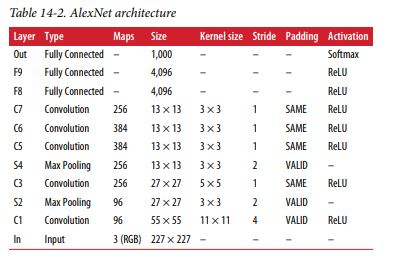

- Dropping과 Data Augmentation을 도입하여  overfitting을 방지함
- 아래와 같이 이미지에 실제 생길수 있는 조건(rotation, light change, crop, resize등을 도입함, white noise를 더하는것은 영향이 없어서 안함)


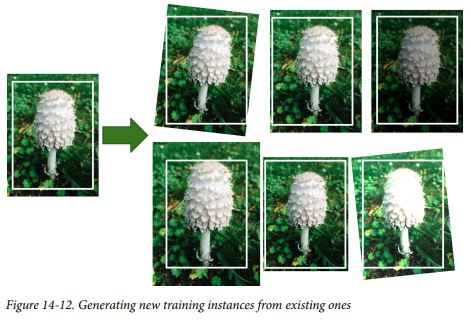

LeNet-5 
Visual Geometry Group Net(VGGNet)
- 활성화 함수로 ReLU 사용, Dropout 적용
- 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
- 인위적으로 데이터셋을 늘림
 - 이미지 변환, 좌우 반전 등의 변환을 시도
- 몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성
- 모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용<br>
https://buomsoo-kim.github.io/keras/2018/05/02/Easy-deep-learning-with-Keras-8.md/ <br>
- 합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용
- 특성맵 깊이를 증가 시킴
- 척도 변경을 통한 데이터 보강(Data Augmentation)
- 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
- 11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
- 이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴
- VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

- LeNet-5, AlexNet, VGG-16, ResNet, Inception Network  
https://wooono.tistory.com/233


# VGG_NET

- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스

2014년 2등 알고리즘으로 convolution layer는 3x3으로 고정하고 depth를 늘리면서 테스트 해 본 결과 나온 알고리즘
- 구조가 간단함
-  3x3 두번반복은 5x5한번, 3x3 세번 반복은 7x7 한번과 같음
- 그러나 3x3으로 여러번 하는것이 유리(더 작은 숫자의 가중치)
- 이 알고리즘 이후 depth가 크게 증가하는 알고리즘들이 대두됨


In [ ]:
vgg_net = keras.applications.vgg16.VGG16(include_top = True, weights = 'imagenet')

553467096/553467096 [==============================] - 24s 0us/step


In [ ]:
vgg_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_net = keras.applications.vgg19.VGG19(include_top = True, weights = 'imagenet')

574710816/574710816 [==============================] - 26s 0us/step


In [ ]:
vgg_net.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# GooLeNet(2014)

- 1x1 convolution과 inception module이 도입됨

- 1x1 convolution의 의미 :

>  depthwise 정보를 추출함

>  bottelneck layer로 차원을 줄여서 계산량을 줄여주고 parameter의 숫자도 줄여줌

>   1x1 con layer와 3x3 5x5등 다른 layer의 조합을 통해 inception module을 사용 할 수 잇음

>   이렇게 조합 할 경우 보다 다양한 정보를 추출 할 수 있다.

GoogLeNet, Inception 모듈
# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워
- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>




In [ ]:
inception3_net = tf.keras.applications.InceptionV3(weights="imagenet",include_top=True, input_shape = None, pooling = None,  classes = 1000)

96112376/96112376 [==============================] - 3s 0us/step


In [ ]:
inception3_net.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

# ResNet - 잔차 네트워크

- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


 Residual Algorithm
 
- 2015년 우승 알고리즘
- 깊이가 깊어지면 무조건 성능이 좋아지는가? 그렇지는 않음
- 기존의 신경망을 입력값 x를 타겟값 y로 매핑하는 함수 H(x)를 얻는 것이 목적
- 여기서 skip의 개념을 도입
- 그러나 ResNet은 F(x) + x를 최소로 만드는것을 목표
- x는 변할수 없는값이므로 F(x)를 최소화 하는것이랑 같음
- F(x) = H(x)-x  이고 이를 잔차(residual)이라고 부름
- ResNet은 기본적으로 VGG19와 동일하나 거기에 convolution층을 추가해서 더욱 깊게 하고  shortcut(Residual Block)을 추가한것이 다임

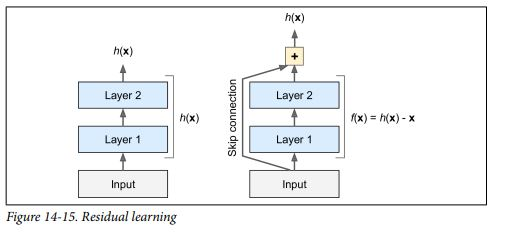


In [ ]:
resnet50 = tf.keras.applications.ResNet50(include_top = True, weights = 'imagenet', input_tensor = None, input_shape = None, pooling = None, classes = 1000)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

# 개 고양이 분류문제 pretrained networks

- 데이터 증식 + dense layer만 training

In [ ]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sladehur","key":"78be80a976261f4976bb5ece8396da8b"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:20<00:00, 38.6MB/s]
100% 812M/812M [00:20<00:00, 41.3MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
# Train 폴더에서 이미지를 추출해서 
# small 폴더에 train 1000개, validation 500개, test 1000개로 생성

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [ ]:
# 이미지 리사이징, 배치 사이즈로 구분

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# augmentation(이미지 증식) 함수 정의
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.3),
    ]
)

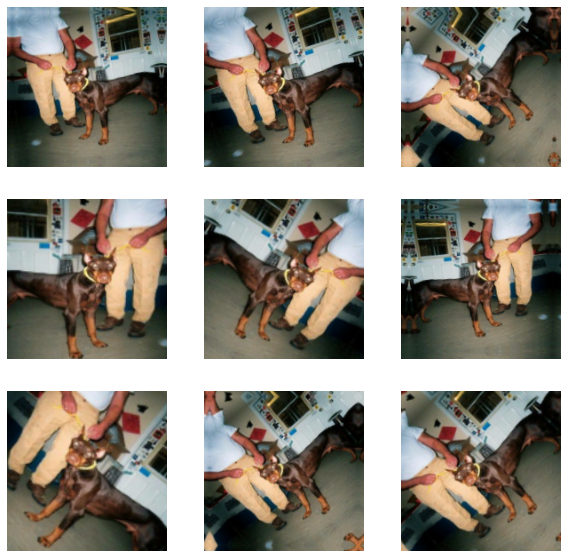

In [ ]:
# 증식 함수 잘 되는지 확인
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
# pretrained network 가져오기

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

# conv 레이어는 그대로 두고 재사용
# 앞의 코드와 같으나 중간에 predict를 통해서 feature를 뽑지않고
# 바로 연결한 형태

# 이미지 증식
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# 이미지 받아오기
inputs = keras.Input(shape=(180, 180, 3))
# 요거 하나 추가
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


# fine tuning
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# 최적으로 저장
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit( train_dataset,   epochs=25,   validation_data=validation_dataset,   callbacks=callbacks)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
63/63 [==============================] - 25s 241ms/step - loss: 16.1594 - accuracy: 0.9025 - val_loss: 4.2874 - val_accuracy: 0.9700
Epoch 2/50
63/63 [==============================] - 13s 210ms/step - loss: 10.1902 - accuracy: 0.9385 - val_loss: 4.2064 - val_accuracy: 0.9730
Epoch 3/50
63/63 [==============================] - 13s 201ms/step - loss: 7.3417 - accuracy: 0.9530 - val_loss: 2.2256 - val_accuracy: 0.9830
Epoch 4/50
63/63 [==============================] - 13s 204ms/step - loss: 6.4318 - accuracy: 0.9540 - val_loss: 3.0149 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 13s 200ms/step - loss: 3.6891 - accuracy: 0.9685 - val_loss: 4.0123 - val_accuracy: 0.9690
Epoch 6/50
63/63 [==============================] - 13s 199ms/step - loss: 4.2516 - accuracy: 0.9680 - val_loss: 2.3513 - val_accuracy: 0.9810
Epoch 7/50
63/63 [==============================] - 13s 201ms/step - loss: 

In [ ]:
print( model.evaluate(test_dataset))

63/63 [==============================] - 7s 113ms/step - loss: 2.8856 - accuracy: 0.9785
[2.885575532913208, 0.9785000085830688]


In [ ]:
# 위에 처럼 바로 써도 되고 아래처럼 저장한거 불러와도 됨
test_model = keras.models.load_model('feature_extraction_with_data_augmentation.keras')
test_model.evaluate(test_dataset)

63/63 [==============================] - 8s 112ms/step - loss: 2.8856 - accuracy: 0.9785


[2.885575294494629, 0.9785000085830688]

In [ ]:
pd.DataFrame(history.history).columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

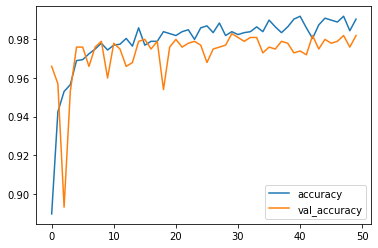

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

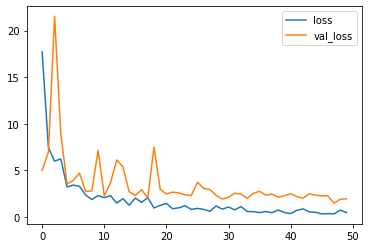

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

# 개 고양이 분류문제 fine tuning

- 데이터증식 및 일부 상위 layer 훈련

In [ ]:
# pretrained network 가져오기

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

# 레이어 중에 마지막 3개 layer는 trainable로 살림
conv_base.trainable = False

for layer in conv_base.layers[-3:]:
  layer.trainable = True

# conv 레이어는 그대로 두고 재사용
# 앞의 코드와 같으나 중간에 predict를 통해서 feature를 뽑지않고
# 바로 연결한 형태

# 이미지 증식

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# 이미지 받아오기
inputs = keras.Input(shape=(180, 180, 3))
# 요거 하나 추가
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


# fine tuning
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate = 1e-5), metrics=["accuracy"])

# 최적으로 저장
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="data_augmentation_fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit( train_dataset,   epochs=20,   validation_data=validation_dataset,   callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 6.7704 - accuracy: 0.6915 

In [ ]:
test_model = keras.models.load_model('feature_extraction_with_data_augmentation_fine_tuning.keras')
test_model.evaluate(test_dataset)

63/63 [==============================] - 8s 115ms/step - loss: 2.1534 - accuracy: 0.9785


[2.1533639430999756, 0.9785000085830688]

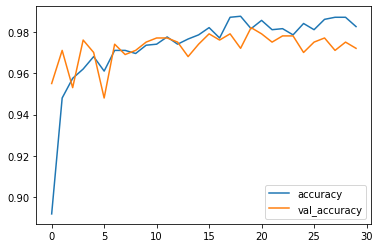

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

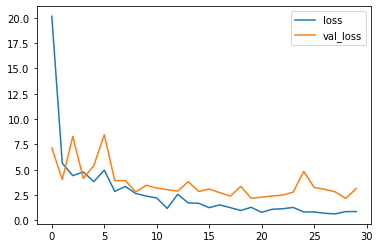

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
# VGG19
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(weights="imagenet", include_top=True)

In [ ]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

--2022-12-12 06:51:06--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.45.162, 172.67.2.204, 104.20.44.162, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.45.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  86.42K  --.-KB/s    in 0.01s   

2022-12-12 06:51:07 (6.24 MB/s) - ‘dog.jpg’ saved [88498/88498]



1/1 [==============================] - 0s 146ms/step
[[('n02088364', 'beagle', 0.8393818), ('n02089973', 'English_foxhound', 0.0883476), ('n02089867', 'Walker_hound', 0.062388174), ('n02088238', 'basset', 0.0045650755), ('n02088632', 'bluetick', 0.003339454)]]


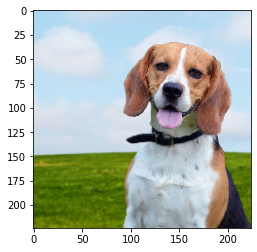

In [ ]:
img = tf.keras.preprocessing.image.load_img('dog.jpg', target_size = (224,224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = vggnet.predict(x)
print(decode_predictions(preds))

In [ ]:
#inception
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

inception = InceptionV3(weights="imagenet", include_top=True)

In [ ]:
!wget -O fish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg

--2022-12-12 06:51:03--  https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4648040 (4.4M) [image/jpeg]
Saving to: ‘fish.jpg’

fish.jpg            100%[===================>]   4.43M  23.1MB/s    in 0.2s    

2022-12-12 06:51:03 (23.1 MB/s) - ‘fish.jpg’ saved [4648040/4648040]



1/1 [==============================] - 2s 2s/step
[[('n01443537', 'goldfish', 0.9748303), ('n02701002', 'ambulance', 0.0023265795), ('n02606052', 'rock_beauty', 0.0019084793), ('n02607072', 'anemone_fish', 0.00066402595), ('n09256479', 'coral_reef', 0.0004321773)]]


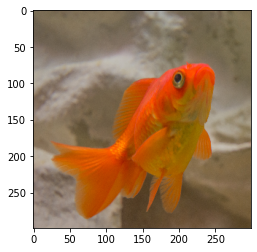

In [ ]:
# inception input 이미지 크기는 299 
img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size = (299,299))

plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = inception.predict(x)
print(decode_predictions(preds))

In [ ]:
#resnet
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

resnet = ResNet50(weights="imagenet", include_top=True)

In [ ]:
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg


--2022-12-12 06:51:00--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421052 (2.3M) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]   2.31M  --.-KB/s    in 0.1s    

2022-12-12 06:51:00 (19.4 MB/s) - ‘bee.jpg’ saved [2421052/2421052]



1/1 [==============================] - 1s 1s/step
[[('n02206856', 'bee', 0.9990995), ('n03530642', 'honeycomb', 0.0005614693), ('n02190166', 'fly', 0.00014320065), ('n02727426', 'apiary', 0.00010164107), ('n02219486', 'ant', 5.7395835e-05)]]


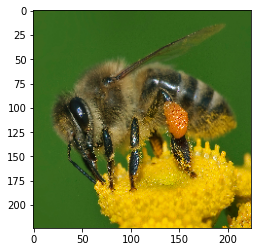

In [ ]:
# inception input 이미지 크기는 299 
img = tf.keras.preprocessing.image.load_img('bee.jpg', target_size = (224,224))

plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = resnet.predict(x)
print(decode_predictions(preds))

# Xception

inception layer대신 depthwise separable convolution(seperable convolution) 을 도입

Xception에서는 각각이 독립이라고 가정

1 by 1 convolution은 cross channel correlation을 뽑아님

n by n(3 by 3 같은거) convolutin은 spatial correlation을 뽑아냄

inception 모듈이 성능이 좋은 이유는 cross channel과 spatial correlation을 잘 분해해서 계산했기 때문이라고 봄

Xception에서는 두가지를 완전히 분리해서 독립적으로 계산

아래는 Depthwise Separable Convolution 을 시각화 한 것

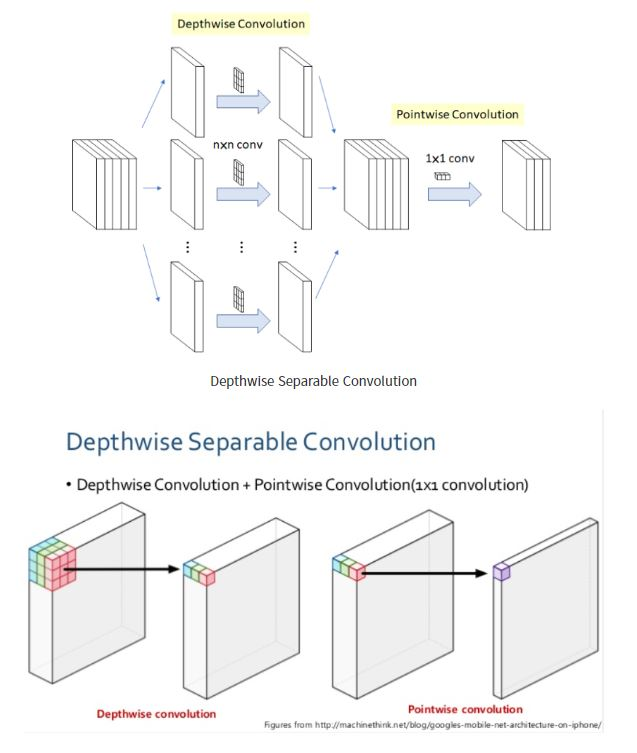

- Xception 의 실제 구현(Modified depthwise seperable convolution)

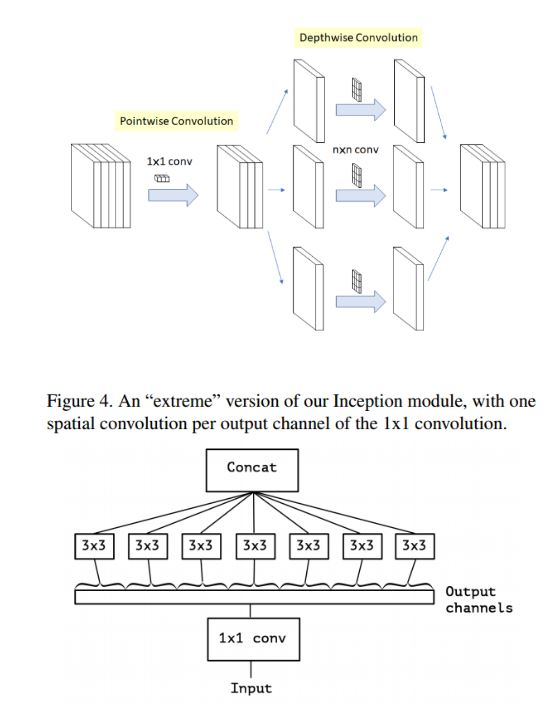



In [ ]:
# xception
from keras.applications.xception import Xception, preprocess_input, decode_predictions

xception = Xception(weights="imagenet", include_top=True)


In [ ]:
!wget -O beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg

--2022-12-12 06:26:32--  https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186747 (182K) [image/jpeg]
Saving to: ‘beaver.jpg’

beaver.jpg          100%[===================>] 182.37K  --.-KB/s    in 0.04s   

2022-12-12 06:26:32 (4.59 MB/s) - ‘beaver.jpg’ saved [186747/186747]



35363/35363 [==============================] - 0s 0us/step
[[('n02363005', 'beaver', 0.8278396), ('n02361337', 'marmot', 0.059819877), ('n02493509', 'titi', 0.004426793), ('n02442845', 'mink', 0.0024072053), ('n01883070', 'wombat', 0.0019868754)]]


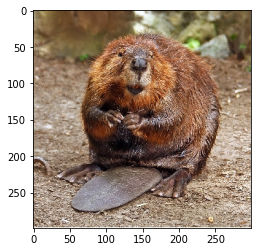

In [ ]:
img = tf.keras.preprocessing.image.load_img('beaver.jpg', target_size = (299,299))

plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = xception.predict(x)
print(decode_predictions(preds))

# MobileNet

* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv와 Pointwise conv 사이에도 batch normalization과 ReLU를 삽입
* Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임


In [ ]:
# Mobilenet
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

mobilenet = MobileNet(weights="imagenet", include_top=True)


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
!wget -O crane.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg

--2022-12-12 06:34:06--  https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg
Resolving p1.pxfuel.com (p1.pxfuel.com)... 172.67.169.122, 104.21.71.48, 2606:4700:3035::6815:4730, ...
Connecting to p1.pxfuel.com (p1.pxfuel.com)|172.67.169.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86911 (85K) [image/jpeg]
Saving to: ‘crane.jpg’

crane.jpg           100%[===================>]  84.87K  --.-KB/s    in 0.02s   

2022-12-12 06:34:07 (5.27 MB/s) - ‘crane.jpg’ saved [86911/86911]



1/1 [==============================] - 1s 1s/step
[[('n03126707', 'crane', 0.9600123), ('n03216828', 'dock', 0.029438494), ('n03240683', 'drilling_platform', 0.0051290384), ('n03344393', 'fireboat', 0.0026267234), ('n04366367', 'suspension_bridge', 0.00050067634)]]


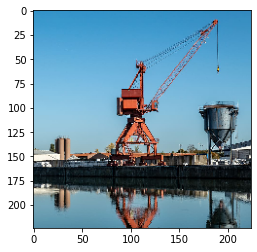

In [ ]:
img = tf.keras.preprocessing.image.load_img('crane.jpg', target_size = (224,224))

plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = mobilenet.predict(x)
print(decode_predictions(preds))

# DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름질 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성 
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">


82524592/82524592 [==============================] - 1s 0us/step
--2022-12-12 06:41:07--  https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188036 (184K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 183.63K  --.-KB/s    in 0.04s   

2022-12-12 06:41:07 (4.61 MB/s) - ‘zebra.jpg’ saved [188036/188036]

1/1 [==============================] - 4s 4s/step
[[('n02391049', 'zebra', 0.93139124), ('n01518878', 'ostrich', 0.019752821), ('n02423022', 'gazelle', 0.011579014), ('n02397096', 'warthog', 0.0046249963), ('n02422106', 'hartebeest', 0.003148672)]]


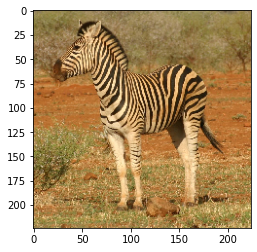

In [ ]:
# DenseNet
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions

densenet = DenseNet201(weights="imagenet", include_top=True)

!wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg


img = tf.keras.preprocessing.image.load_img('zebra.jpg', target_size = (224,224))

plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = densenet.predict(x)
print(decode_predictions(preds))


1/1 [==============================] - 1s 665ms/step
[[('n02391049', 'zebra', 0.9996624), ('n02129604', 'tiger', 0.0001819669), ('n02123159', 'tiger_cat', 6.0468414e-05), ('n02423022', 'gazelle', 3.3144956e-05), ('n01704323', 'triceratops', 1.2617281e-05)]]
1/1 [==============================] - 0s 77ms/step
[[('n01443537', 'goldfish', 0.99909985), ('n02606052', 'rock_beauty', 0.00026856127), ('n02655020', 'puffer', 0.00010316958), ('n01682714', 'American_chameleon', 9.8976416e-05), ('n01820546', 'lorikeet', 8.419974e-05)]]
1/1 [==============================] - 0s 75ms/step
[[('n02206856', 'bee', 0.99739504), ('n02190166', 'fly', 0.002277103), ('n03530642', 'honeycomb', 0.00016715587), ('n02219486', 'ant', 0.00011216526), ('n02276258', 'admiral', 1.5134672e-05)]]
1/1 [==============================] - 0s 74ms/step
[[('n03126707', 'crane', 0.9600123), ('n03216828', 'dock', 0.029438494), ('n03240683', 'drilling_platform', 0.0051290384), ('n03344393', 'fireboat', 0.0026267234), ('n043663

,zebra,goldfish,bee,crane,beaver,beagle,걸린시간
MobileNet,0.999662,0.999100,0.997395,0.960012,0.968447,0.903564,2.006692
DenseNet,0.931391,0.999816,0.977011,0.988567,0.976860,0.728383,13.169702
Xception,0.953554,0.908362,0.792895,0.743240,0.827840,0.855610,9.630379
ResNet,0.962000,0.994548,0.999099,0.994077,0.994418,0.975307,3.558040
Inception,0.969237,0.974831,0.964832,0.772612,0.958988,0.502833,4.037026
VGG19,0.999601,0.999947,0.998108,0.631108,0.889396,0.839382,10.187993


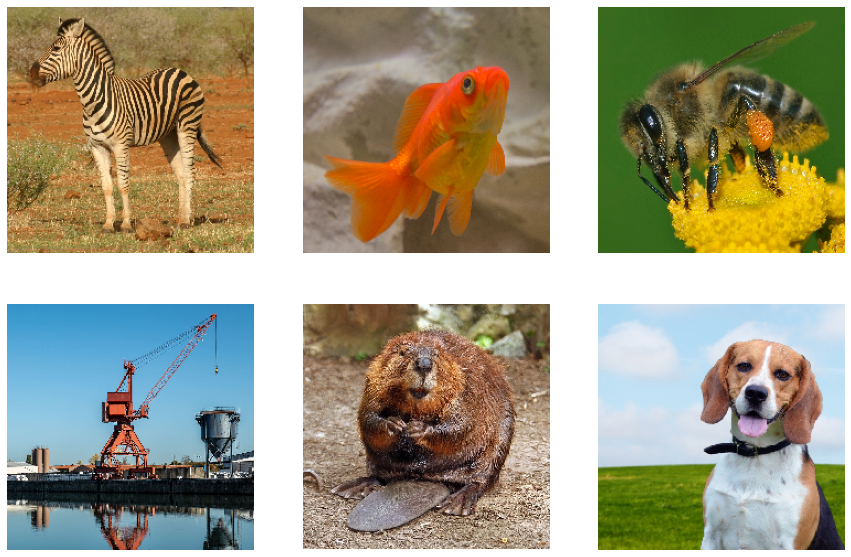

In [ ]:
import os
import time


file_list = os.listdir('./')

file_list_jpg = [f for f in file_list if f.endswith(".jpg")]

prediction_result = pd.DataFrame()

#mobilenet
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
mobilenet = MobileNet(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = mobilenet.predict(x)
  prediction_result.loc['MobileNet',i] = decode_predictions(preds)[0][0][2]  # 1번 분류가 맞다는 가정하에 확률 출력(분류는 잘 되었기 때문에 확률만 출력)
  print(decode_predictions(preds))

prediction_result.loc['MobileNet',6] = time.time() - start

#densenet
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions
densenet = DenseNet201(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = densenet.predict(x)
  prediction_result.loc['DenseNet',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['DenseNet',6] = time.time() - start

#Xception
from keras.applications.xception import Xception, preprocess_input, decode_predictions
xception = Xception(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (299,299))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = xception.predict(x)
  prediction_result.loc['Xception',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['Xception',6] = time.time() - start

#ResNet
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
resnet = ResNet50(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = resnet.predict(x)
  prediction_result.loc['ResNet',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['ResNet',6] = time.time() - start  

#inception
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
inception = InceptionV3(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (299,299))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = inception.predict(x)
  prediction_result.loc['Inception',i] = decode_predictions(preds)[0][0][2] 
  print(decode_predictions(preds))

prediction_result.loc['Inception',6] = time.time() - start    

# VGG19
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
vggnet = VGG19(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = vggnet.predict(x)
  prediction_result.loc['VGG19',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['VGG19',6] = time.time() - start      


# 이미지 출력
plt.figure(figsize=(15, 10))
for i, f in enumerate(file_list_jpg) :
  img_name = './'  + f
  ax = plt.subplot(2, 3, i + 1)
  img = tf.keras.preprocessing.image.load_img(img_name, target_size = (224,224))
  plt.imshow(img)
  plt.axis("off")


#column rename
prediction_result.rename(columns={0:'zebra', 1:'goldfish', 2:'bee', 3:'crane', 4:'beaver', 5:'beagle', 6:'걸린시간'}, inplace = True)

prediction_result

In [ ]:
decode_predictions(preds)[0][0]

('n02088364', 'beagle', 0.8393818)